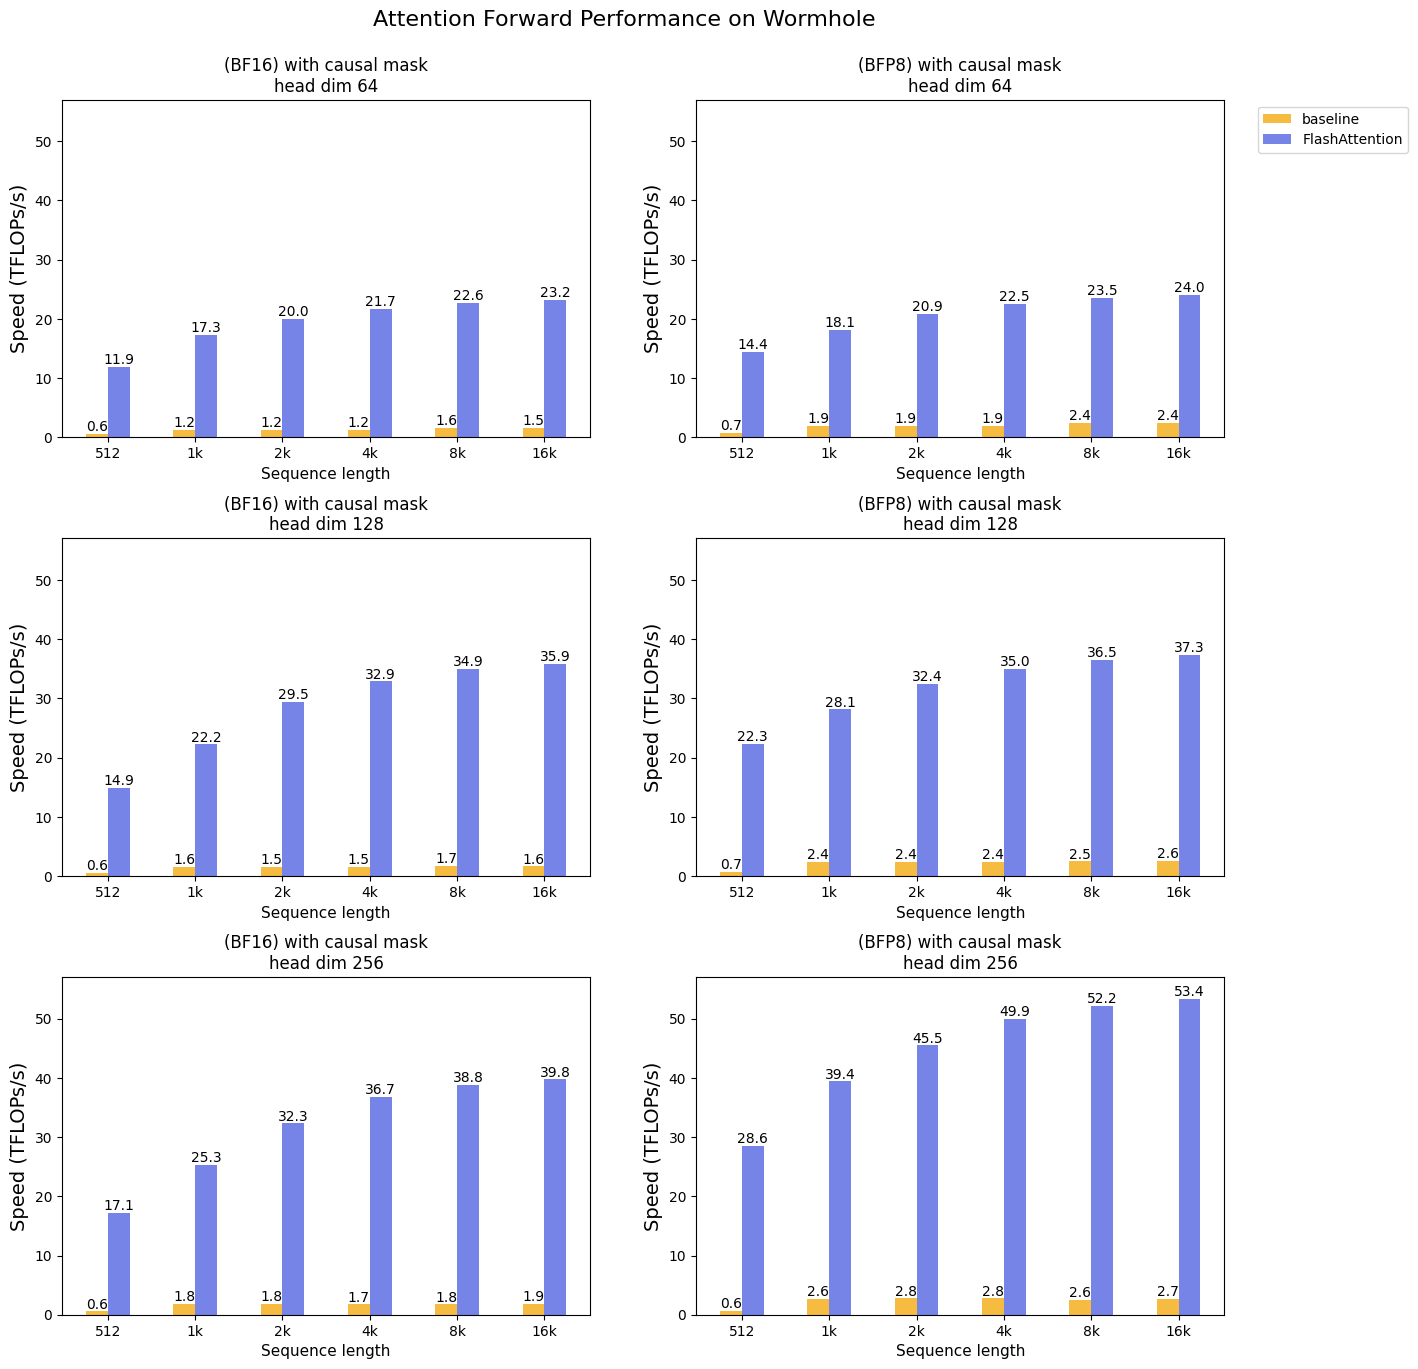

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
# df = pd.read_csv('attention_data.csv')

# Define the parameters
head_dims = [64, 128, 256]
seq_lengths = [512, 1024, 2048, 4096, 8192, 16384]
# attention_types = ['Standard attention', 'FlashAttention-2', 'Triton', 'cuDNN', 'FlashAttention-3']
# causal_masks = [True, False]

# # Create empty lists to store the data
# data = []

# # Generate fake data
# for head_dim in head_dims:
#     for causal_mask in causal_masks:
#         for attention_type in attention_types:
#             for seq_len in seq_lengths:
#                 # Generate a fake TFLOP/s value
#                 # We'll make it increase with sequence length and head_dim for realism
#                 base_tflops = np.random.uniform(100, 500)
#                 tflops = base_tflops * (seq_len / 512) ** 0.2 * (head_dim / 64) ** 0.3
                
#                 # Adjust based on attention type (just for variation)
#                 if attention_type == 'Standard attention':
#                     tflops *= 0.5
#                 elif attention_type in ['FlashAttention-2', 'FlashAttention-3']:
#                     tflops *= 1.2
                
#                 # Slightly lower performance for causal mask
#                 if causal_mask:
#                     tflops *= 0.9

#                 data.append({
#                     'head_dim': head_dim,
#                     'sequence_length': seq_len,
#                     'tflops': round(tflops, 1),
#                     'attention_type': attention_type,
#                     'causal_mask': causal_mask
#                 })

# # Create the DataFrame
# df = pd.DataFrame(data)

# df = pd.read_csv('attention_data.csv')
df8 = pd.read_csv('FA WH Perf - bfp8_max.csv')
df8_baseline = pd.read_csv('FA WH Perf - bfp8 baseline rows.csv')
df16 = pd.read_csv('FA WH Perf - bf16_max.csv')
df16_baseline = pd.read_csv('FA WH Perf - bf16 baseline rows.csv')
# df = pd.read_csv('FA WH Perf - bf16_max.csv')


# Define the attention types and their colors
attention_types = ['baseline', 'FlashAttention']
colors = ['#F6BC42', '#7584E6', '#ff7f0e', '#2ca02c', '#d62728', ]

# Create a figure with 6 subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Define the causal mask conditions
causal_masks = ['with causal mask']

x = np.arange(len(seq_lengths))

# Iterate over the subplots
for i, (head_dim, causal_mask) in enumerate(zip([64, 128, 256], causal_masks * 3)):
    ax = axs[i*2]
    
    # Filter data for this subplot
    # subplot_data = df[(df['head_dim'] == head_dim)]
    subplot_data = df16[(df16['D_HEAD'] == head_dim)]
    subplot_data_baseline = df16_baseline[(df16_baseline['D_HEAD'] == head_dim)]

   # Calculate the width of each bar group
    n_groups = len(attention_types)
    width = 0.5 / n_groups
    
    # Create the grouped bar plot
    for j, attention_type in enumerate(attention_types):
        data = subplot_data_baseline if attention_type == 'baseline' else subplot_data
        offsets = x - 0.25 + (j + 0.5) * width

        bars = ax.bar(offsets, data['TFLOPS/s'], width, label=attention_type, color=colors[j])

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom', rotation=0)
    
    
    # Set labels and title
    ax.set_xlabel('Sequence length', fontsize=11)
    ax.set_ylabel('Speed (TFLOPs/s)', fontsize=14)
    ax.set_title(f'(BF16) {causal_mask}\nhead dim {head_dim}')
    39*26
    # Set x-ticks
    ax.set_xticks(x)
    ax.set_xticklabels(['512', '1k', '2k', '4k', '8k', '16k'])
    
    ax.set_ylim(0, 57)

    ax = axs[i*2+1]
    
    # Filter data for this subplot
    # subplot_data = df[(df['head_dim'] == head_dim)]
    subplot_data = df8[(df8['D_HEAD'] == head_dim)]
    subplot_data_baseline = df8_baseline[(df8_baseline['D_HEAD'] == head_dim)]

   # Calculate the width of each bar group
    n_groups = len(attention_types)
    width = 0.5 / n_groups
    
    # Create the grouped bar plot
    for j, attention_type in enumerate(attention_types):
        data = subplot_data_baseline if attention_type == 'baseline' else subplot_data
        offsets = x - 0.25 + (j + 0.5) * width

        bars = ax.bar(offsets, data['TFLOPS/s'], width, label=attention_type, color=colors[j])

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom', rotation=0)
    
    
    # Set labels and title
    ax.set_xlabel('Sequence length', fontsize=11)
    ax.set_ylabel('Speed (TFLOPs/s)', fontsize=14)
    ax.set_title(f'(BFP8) {causal_mask}\nhead dim {head_dim}')
    39*26
    # Set x-ticks
    ax.set_xticks(x)
    ax.set_xticklabels(['512', '1k', '2k', '4k', '8k', '16k'])
    
    ax.set_ylim(0, 57)
    
    # Add legend to the first subplot only
    if i == 0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
# plt.tight_layout()
plt.suptitle('Attention Forward Performance on Wormhole', fontsize=16)
plt.subplots_adjust(top=0.92, hspace=.3)

# Show the plot
plt.show()

In [4]:
df

,head_dim,sequence_length,tflops,attention_type,causal_mask
0,64,512,153.7,Standard attention,True
1,64,1000,242.0,Standard attention,True
2,64,2000,126.4,Standard attention,True
3,64,4000,211.9,Standard attention,True
4,64,8000,156.7,Standard attention,True
...,...,...,...,...,...
175,256,1000,406.2,FlashAttention-3,False
176,256,2000,304.9,FlashAttention-3,False
177,256,4000,642.6,FlashAttention-3,False
178,256,8000,1458.8,FlashAttention-3,False


In [2]:
df = pd.read_csv('FA WH Perf - bf16_max.csv')

In [3]:
df

,OP CODE,HIDDEN_DIM,Q_CHUNK,K_CHUNK,FLOPS = 2*batch*seqlen**2*num_heads*head_dim,TFLOPS/s,ATTRIBUTES,MATH FIDELITY,CORE COUNT,HOST START TS,...,COMPUTE KERNEL HASH,DATA MOVEMENT KERNEL PATH,DATA MOVEMENT KERNEL HASH,PM IDEAL [ns],PM COMPUTE [ns],PM BANDWIDTH [ns],PM REQ I BW,PM REQ O BW,CompileProgram_TT_HOST_FUNC [ns],HWCommandQueue_write_buffer_TT_HOST_FUNC [ns]
0,ScaledDotProductAttention &,2048,128,128,34359738368,11.928187,{'compute_kernel_config': 'WormholeComputeKern...,HiFi2,64,9475791216,...,['sdpa/14087916794470359626/'],['tt_eager/tt_dnn/op_library/sdpa/kernels/data...,['reader_interleaved/5779227199983482438/'; 'w...,1,242248,242248,[277.02545166015625; 8.657045364379883; 8.6570...,[277.02545166015625],1170717966,9280169
1,ScaledDotProductAttention &,2048,256,256,68719476736,17.269598,{'compute_kernel_config': 'WormholeComputeKern...,HiFi2,64,118496017139,...,['sdpa/13534465878184359479/'],['tt_eager/tt_dnn/op_library/sdpa/kernels/data...,['reader_interleaved/14254018263610909760/'; '...,1,242248,242248,[277.02545166015625; 8.657045364379883; 8.6570...,[277.02545166015625],1191075066,14899814
2,ScaledDotProductAttention &,2048,256,256,137438953472,19.971695,{'compute_kernel_config': 'WormholeComputeKern...,HiFi2,64,183802579861,...,['sdpa/18129537487847746657/'],['tt_eager/tt_dnn/op_library/sdpa/kernels/data...,['reader_interleaved/4870669573864927012/'; 'w...,1,242248,242248,[277.02545166015625; 8.657045364379883; 8.6570...,[277.02545166015625],1155553491,22329729
3,ScaledDotProductAttention &,2048,256,256,274877906944,21.662785,{'compute_kernel_config': 'WormholeComputeKern...,HiFi2,64,254789098576,...,['sdpa/17454240413124780683/'],['tt_eager/tt_dnn/op_library/sdpa/kernels/data...,['reader_interleaved/4122277566522168511/'; 'w...,1,242248,242248,[277.02545166015625; 8.657045364379883; 8.6570...,[277.02545166015625],1156509009,35592654
4,ScaledDotProductAttention &,2048,256,256,549755813888,22.633035,{'compute_kernel_config': 'WormholeComputeKern...,HiFi2,64,335664882179,...,['sdpa/5329037505586258659/'],['tt_eager/tt_dnn/op_library/sdpa/kernels/data...,['reader_interleaved/3596591786901215057/'; 'w...,1,242248,242248,[277.02545166015625; 8.657045364379883; 8.6570...,[277.02545166015625],1178126776,66716126
5,ScaledDotProductAttention &,2048,256,256,1099511627776,23.167602,{'compute_kernel_config': 'WormholeComputeKern...,HiFi2,64,468442028548,...,['sdpa/14593163002725634413/'],['tt_eager/tt_dnn/op_library/sdpa/kernels/data...,['reader_interleaved/14449482910005769449/'; '...,1,242248,242248,[277.02545166015625; 8.657045364379883; 8.6570...,[277.02545166015625],2395510550,22764551
6,ScaledDotProductAttention &,2048,256,256,34359738368,14.855182,{'compute_kernel_config': 'WormholeComputeKern...,HiFi2,64,527714770793,...,['sdpa/7986175276005363374/'],['tt_eager/tt_dnn/op_library/sdpa/kernels/data...,['reader_interleaved/15525999210160870437/'; '...,1,242248,242248,[277.02545166015625; 17.314090728759766; 17.31...,[277.02545166015625],2225010820,23133437
7,ScaledDotProductAttention &,2048,256,256,68719476736,22.230464,{'compute_kernel_config': 'WormholeComputeKern...,HiFi2,64,586402302924,...,['sdpa/9206159931512221876/'],['tt_eager/tt_dnn/op_library/sdpa/kernels/data...,['reader_interleaved/10631655137924020645/'; '...,1,242248,242248,[277.02545166015625; 17.314090728759766; 17.31...,[277.02545166015625],2235904160,29628221
8,ScaledDotProductAttention &,2048,256,256,137438953472,29.462491,{'compute_kernel_config': 'WormholeComputeKern...,HiFi2,64,648356291794,...,['sdpa/10028893077259373994/'],['tt_eager/tt_dnn/op_library/sdpa/kernels/data...,['reader_interleaved/160043144679485823/'; 'wr...,1,242248,242248,[277.02545166015625; 17.314090728759766; 17.31...,[277.02545166015625],2242363244,44323668
9,ScaledDotProductAttention &,2048,256,256,274877906944,32.884581,{'compute_kernel_config': 'WormholeComputeKern...,HiFi2,64,712916071527,...,['sdpa/3959531808268088611/'],['tt_eager/tt_dnn/op_library/sdpa/kernels/data...,